🎓 Capstone Project 1 — California Housing Prediction

1. Project Overview
1.1 Overview and Problem Statement

## Import the required packages

In [12]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense


/Users/kelvinchan/Documents/Documents - Kelvin’s MacBook Air/dev/capstone-california-housing/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


## Load Data

In [13]:
df = pd.read_csv('housing.csv')
print(df.head())
print(df.shape)


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
(20640, 10)


## 2. Data Preparation and Exploratory Data Analysis (EDA)

In [17]:
# 2. Data Preparation and Exploratory Data Analysis (EDA)

# Show the columns
print(df.columns)

# ocean_proximity is categorical variable
to_categorical = ['ocean_proximity']
df[to_categorical] = df[to_categorical].astype('category')

# housing_median_age and total_rooms are integer variables
to_integer = ['housing_median_age', 'total_rooms', 'households', 'population']
df[to_integer] = df[to_integer].astype('int64')

numerical_features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']

print(df.info())
print(df.describe())


Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           20640 non-null  float64 
 1   latitude            20640 non-null  float64 
 2   housing_median_age  20640 non-null  int64   
 3   total_rooms         20640 non-null  int64   
 4   total_bedrooms      20433 non-null  float64 
 5   population          20640 non-null  int64   
 6   households          20640 non-null  int64   
 7   median_income       20640 non-null  float64 
 8   median_house_value  20640 non-null  float64 
 9   ocean_proximity     20640 non-null  category
dtypes: category(1), float64(5), int64(4)
memory usage: 1.4 MB
None
          lon

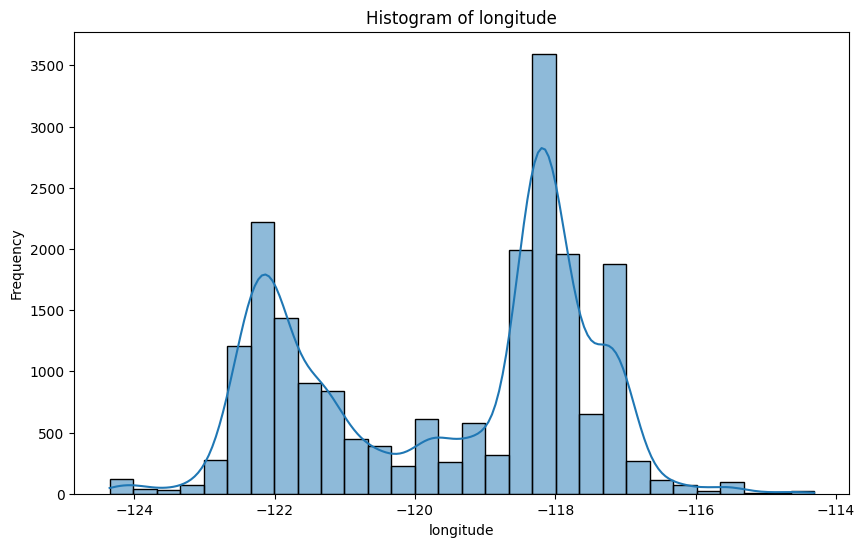

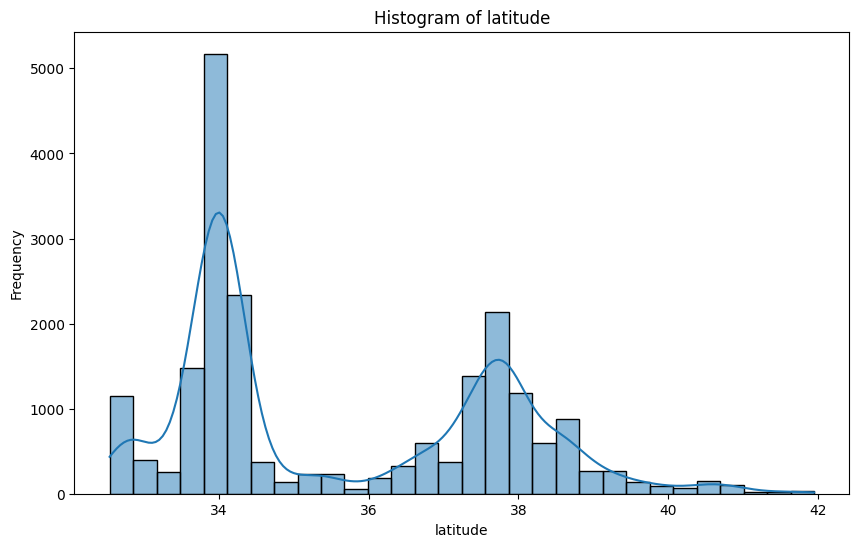

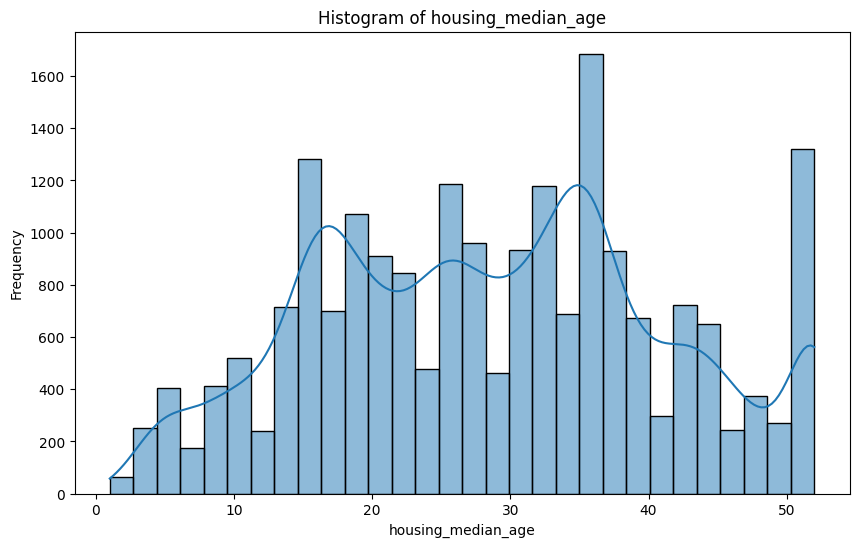

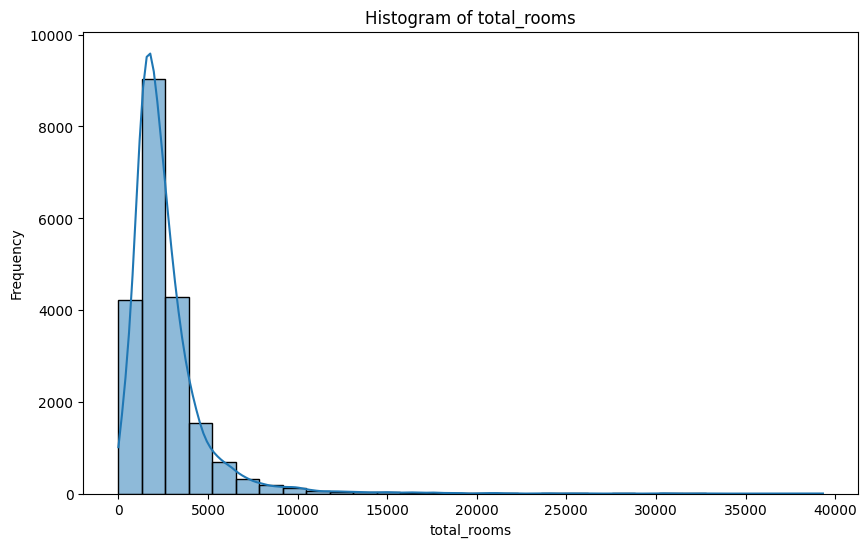

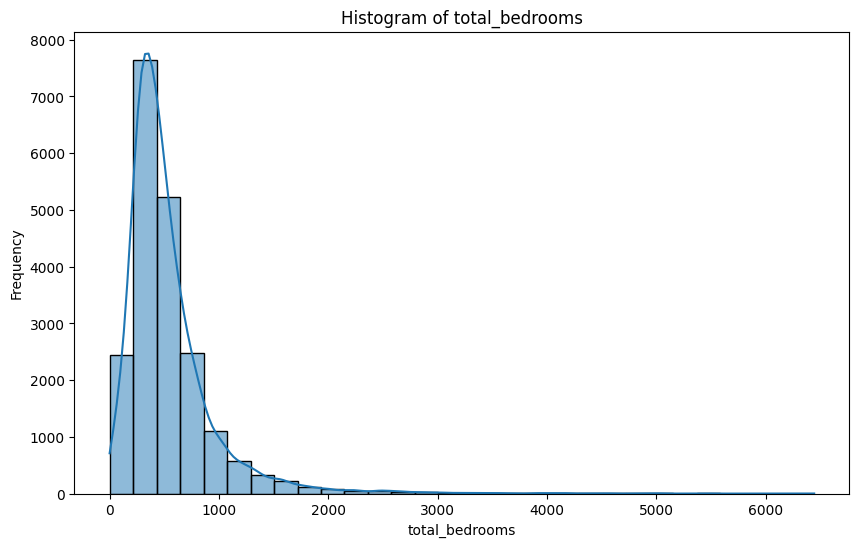

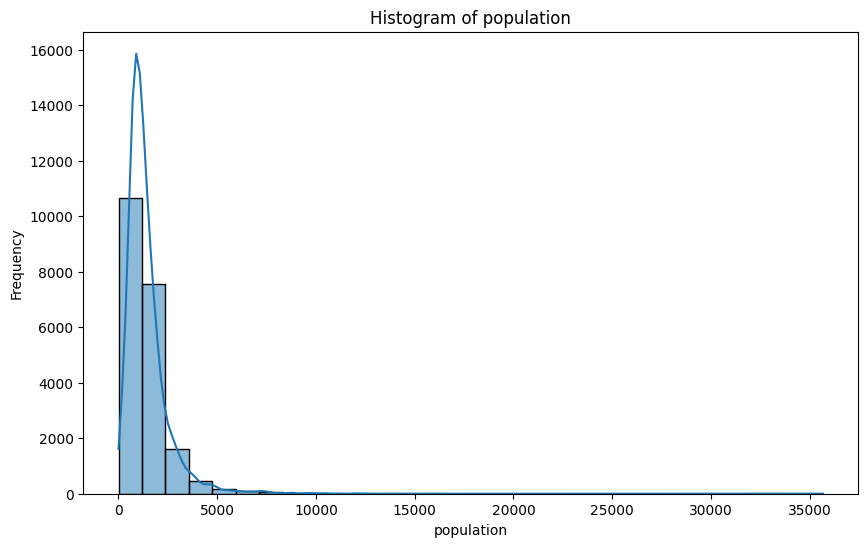

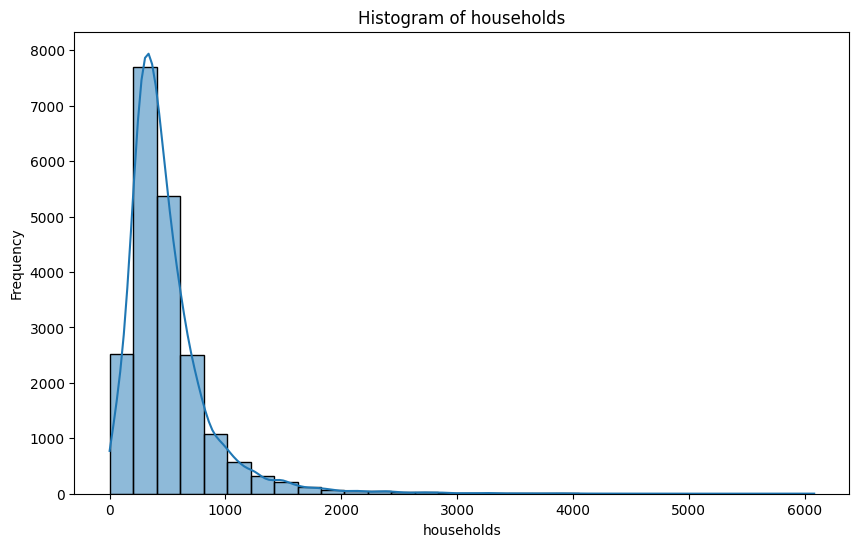

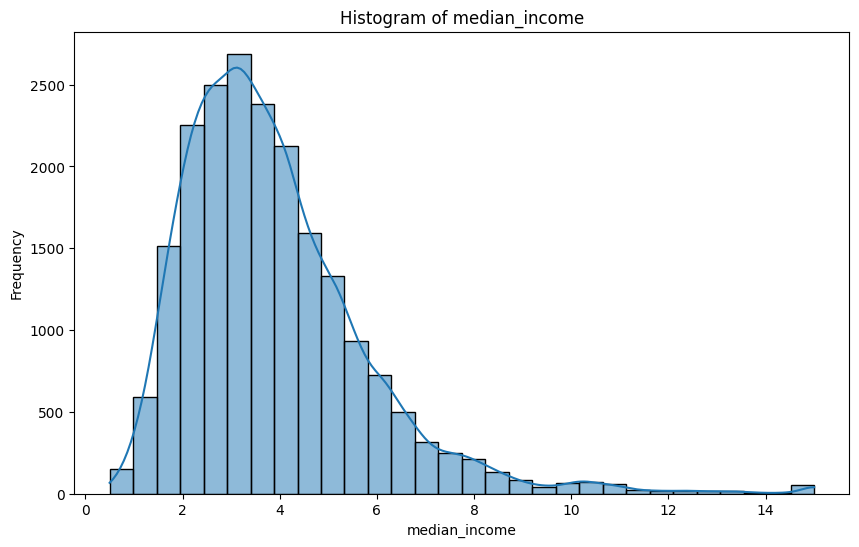

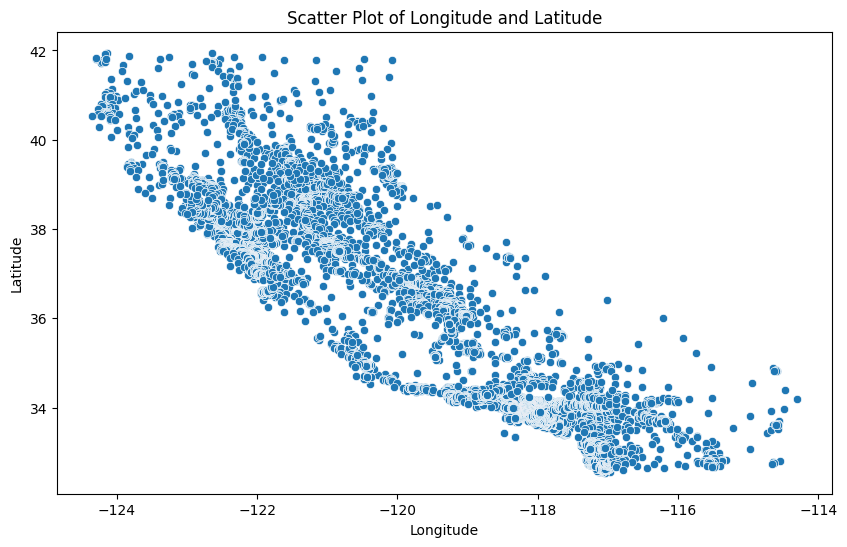

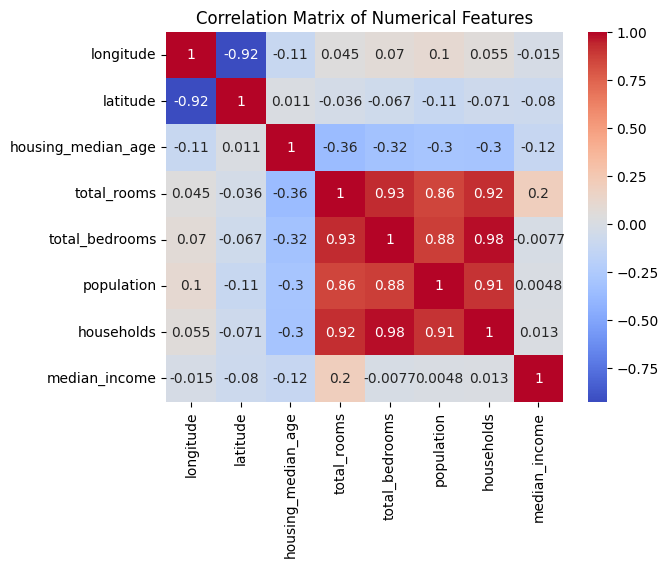

In [ ]:
# plot the histogram of the numerical features
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[feature], bins=30)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

# plot the scatter plot of longitude and latitude
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='latitude', data=df)
plt.title('Scatter Plot of Longitude and Latitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# plot heatmap of the correlation matrix of the numerical features
corr_matrix = df[numerical_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()



# 3. Data Preprocessing

In [15]:
# Split the data into training and testing sets
df_all_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_all_train, test_size=0.25, random_state=42)

y_train = df_train.median_house_value.values
y_val = df_val.median_house_value.values
y_test = df_test.median_house_value.values

df_train = df_train.drop('median_house_value', axis=1)
df_val = df_val.drop('median_house_value', axis=1)
df_test = df_test.drop('median_house_value', axis=1)

dv = DictVectorizer(sparse=True)

train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

all_train_dict = df_all_train.to_dict(orient='records')
X_all_train = dv.fit_transform(all_train_dict)

val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

test_dict = df_test.to_dict(orient='records')
X_test = dv.transform(test_dict)

print(dv.get_feature_names_out())

# 4. Feature Engineering    
# Convert categorical variables to numerical



['households' 'housing_median_age' 'latitude' 'longitude'
 'median_house_value' 'median_income' 'ocean_proximity=<1H OCEAN'
 'ocean_proximity=INLAND' 'ocean_proximity=ISLAND'
 'ocean_proximity=NEAR BAY' 'ocean_proximity=NEAR OCEAN' 'population'
 'total_bedrooms' 'total_rooms']
